# Multidimensional Scaling (MDS) 
Multidimensional Scaling (MDS) is a dimensionality reduction and visualization technique used to represent high-dimensional data in 2 or 3 dimensions while preserving the pairwise distances (dissimilarities) between points as much as possible.

It’s often used for visualizing similarity or dissimilarity among items.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [2]:
# Load data
file_path = 'C:/Users/Monir/Downloads/UN_Statistics.csv'  # Replace with your file path or use file dialog
df = pd.read_csv(file_path)
X = df.iloc[:, 1:].values
labels = df.iloc[:, 0].values

Country      object
Increase    float64
Life        float64
IMR           int64
TFR         float64
GDP         float64
dtype: object


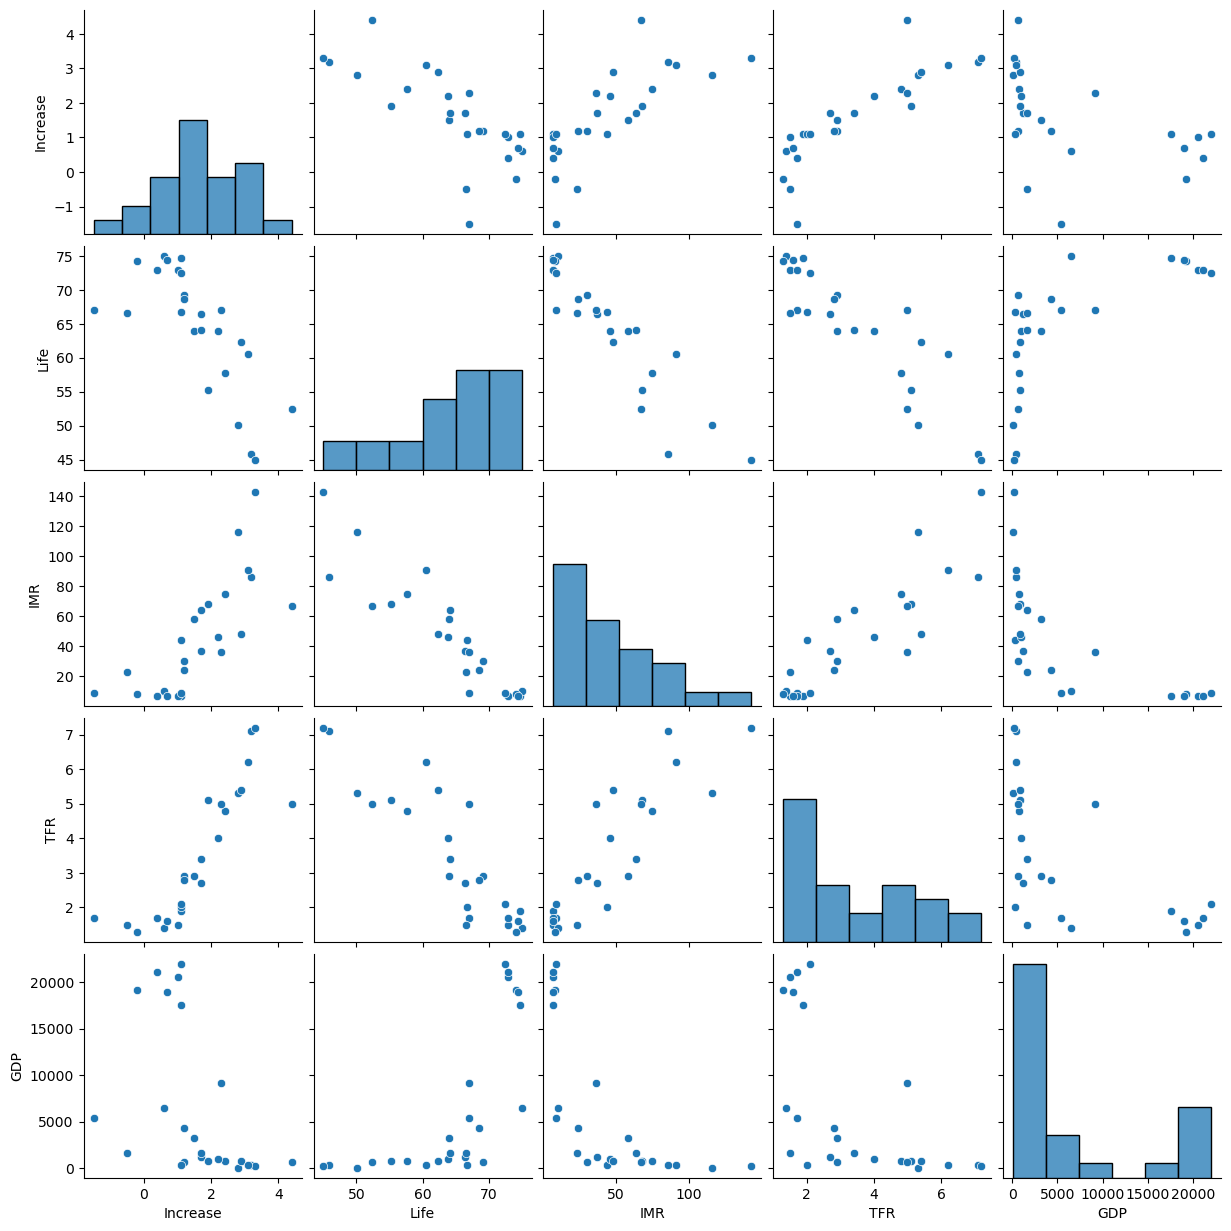

In [3]:
# Data exploration
print(df.dtypes)
sns.pairplot(pd.DataFrame(X, columns=df.columns[1:]))
plt.show()

C:\Users\Monir\AppData\Local\Temp\ipykernel_14492\1381399926.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cluster = linkage(dist_matrix, method='complete')


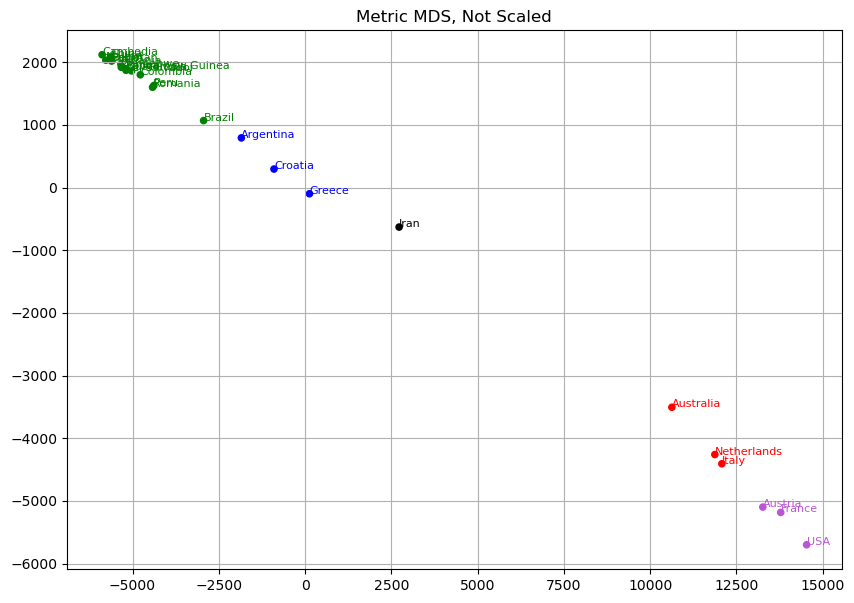

In [5]:
# Raw Euclidean distance and MDS (Not Scaled)
dist_matrix = pairwise_distances(X, metric='euclidean')
cluster = linkage(dist_matrix, method='complete')
clusvec = fcluster(cluster, t=5, criterion='maxclust')

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(dist_matrix)

colors = ['mediumorchid', 'red', 'green', 'blue', 'black', 'gold', 'indianred', 'moccasin', 'lightcyan', 'skyblue']

plt.figure(figsize=(10, 7))
plt.scatter(mds_coords[:, 0], mds_coords[:, 1], c=[colors[i-1] for i in clusvec], s=20)
for i, label in enumerate(labels):
    plt.text(mds_coords[i, 0], mds_coords[i, 1], label, fontsize=8, color=colors[clusvec[i]-1])
plt.title("Metric MDS, Not Scaled")
plt.grid(True)
plt.show()

C:\Users\Monir\AppData\Local\Temp\ipykernel_14492\200020538.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cluster_scaled = linkage(dist_matrix_scaled, method='complete')


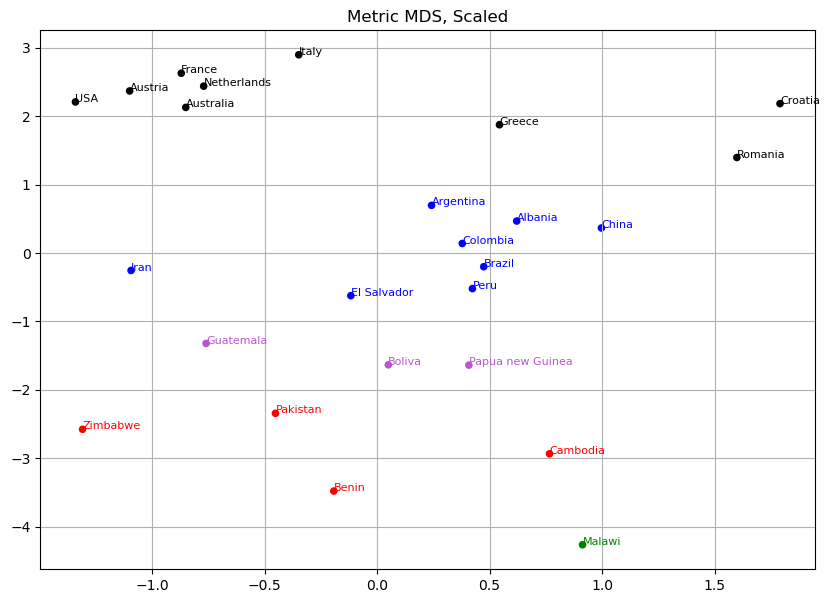

In [6]:
# Scaled MDS
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dist_matrix_scaled = pairwise_distances(X_scaled, metric='euclidean')
cluster_scaled = linkage(dist_matrix_scaled, method='complete')
clusvec_scaled = fcluster(cluster_scaled, t=5, criterion='maxclust')

mds_scaled = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords_scaled = mds_scaled.fit_transform(dist_matrix_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(mds_coords_scaled[:, 0], mds_coords_scaled[:, 1], c=[colors[i-1] for i in clusvec_scaled], s=20)
for i, label in enumerate(labels):
    plt.text(mds_coords_scaled[i, 0], mds_coords_scaled[i, 1], label, fontsize=8, color=colors[clusvec_scaled[i]-1])
plt.title("Metric MDS, Scaled")
plt.grid(True)
plt.show()

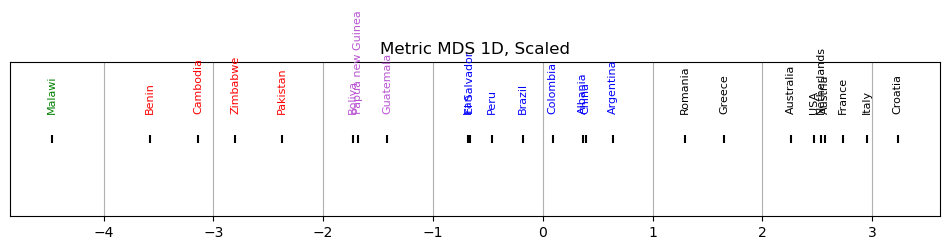

In [7]:
# 1D MDS
mds_1d = MDS(n_components=1, dissimilarity='precomputed', random_state=42)
mds_1d_coords = mds_1d.fit_transform(dist_matrix_scaled)

plt.figure(figsize=(12, 2))
plt.scatter(mds_1d_coords[:, 0], np.ones_like(mds_1d_coords[:, 0]), marker='|', color='black')
for i, label in enumerate(labels):
    plt.text(mds_1d_coords[i, 0], 1.02, label, rotation=90, ha='center',
             color=colors[clusvec_scaled[i]-1], fontsize=8)
plt.yticks([])
plt.title("Metric MDS 1D, Scaled")
plt.grid(True)
plt.show()

C:\Users\Monir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


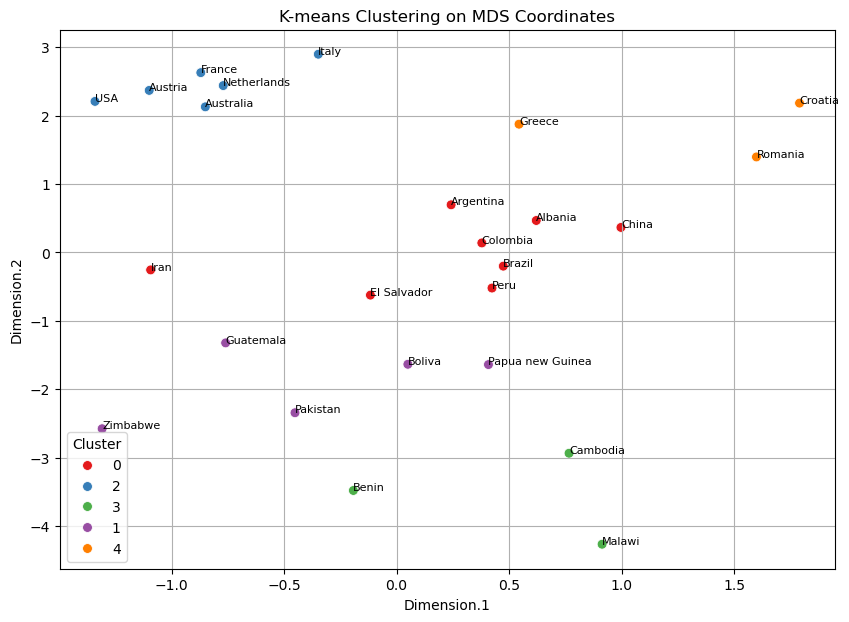

In [8]:
# K-means clustering on MDS coordinates
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(mds_coords_scaled)

# Create DataFrame for ggplot-style plotting
mds_df = pd.DataFrame(mds_coords_scaled, columns=["Dimension.1", "Dimension.2"])
mds_df['Label'] = labels
mds_df['Cluster'] = kmeans_labels.astype(str)

plt.figure(figsize=(10, 7))
sns.scatterplot(data=mds_df, x="Dimension.1", y="Dimension.2", hue="Cluster", palette="Set1", s=50)
for i in range(mds_df.shape[0]):
    plt.text(mds_df.loc[i, "Dimension.1"], mds_df.loc[i, "Dimension.2"], mds_df.loc[i, "Label"],
             fontsize=8, color='black')
plt.title("K-means Clustering on MDS Coordinates")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


C:\Users\Monir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


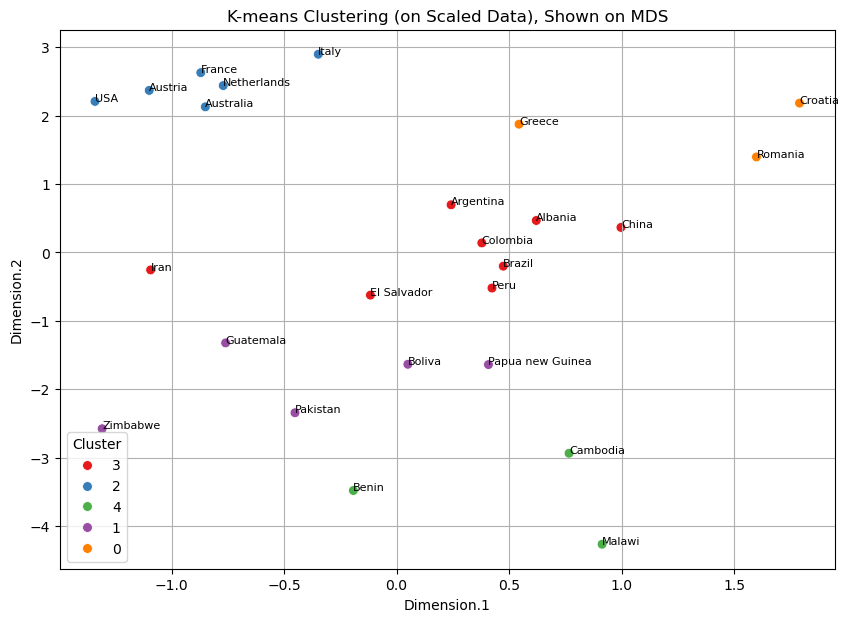

In [9]:
# K-means clustering on the scaled data (NOT MDS!)
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add K-means cluster labels to the MDS DataFrame (for visualization only)
mds_df = pd.DataFrame(mds_coords_scaled, columns=["Dimension.1", "Dimension.2"])
mds_df['Label'] = labels
mds_df['Cluster'] = kmeans_labels.astype(str)

# Plot MDS with K-means clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=mds_df, x="Dimension.1", y="Dimension.2", hue="Cluster", palette="Set1", s=50)
for i in range(mds_df.shape[0]):
    plt.text(mds_df.loc[i, "Dimension.1"], mds_df.loc[i, "Dimension.2"], mds_df.loc[i, "Label"],
             fontsize=8, color='black')
plt.title("K-means Clustering (on Scaled Data), Shown on MDS")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()
